### Importing all the neccarry Libraries used in the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

### Importing train dataset

In [2]:
data= pd.read_csv('./Google_Stock_Price_Train.csv', parse_dates= ['Date'], index_col= 'Date')

In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


### Converting the Close feature datatype into numeric  

In [5]:
data['Close']= data['Close'].str.replace(',', '')
data['Close']= pd.to_numeric(data['Close'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   object 
dtypes: float64(4), object(1)
memory usage: 59.0+ KB


### Creating the new dataframe with Close feature from data

In [7]:
trained_data= data[['Close']]

In [8]:
trained_data.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


### Plotting the new Dataframe to find out the characterstics of close feature


<Figure size 1152x360 with 0 Axes>

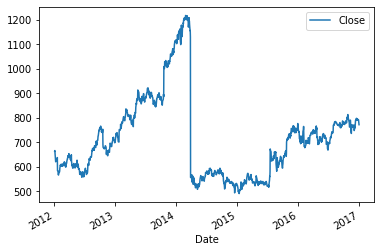

In [9]:
plt.figure(figsize=(16,5))
trained_data.plot()
plt.show()

In [10]:
# train= trained_data[:round(len(trained_data)*0.80)]
# test= trained_data[round(len(trained_data)*0.80):]

In [11]:
trained_data.head()

,Close
Date,
2012-01-03,663.59
2012-01-04,666.45
2012-01-05,657.21
2012-01-06,648.24
2012-01-09,620.76


### Using the MinMax Scaler to scale the value between 0 and 1

In [12]:
scaler= MinMaxScaler(feature_range=(0,1))
stock_price= scaler.fit_transform(trained_data)

In [13]:
stock_price.shape

(1258, 1)

### Below we will be taking previous 40 days open datasteps to predict the next values.
### so we are converting our train data as per our input in LTSM layers. i.e for taking 0 to 39 days open price to get 40th day price as output, 1 to 40 for 41, 2 to 41 for 42



### Here we are doing Feature Selection

In [14]:
xtrain= []
y_train= []

for i in range(40, len(stock_price)):
    xtrain.append(stock_price[i-40: i,0])
    y_train.append(stock_price[i,0])
#       print(i)

In [15]:
# x_train

In [16]:
xtrain= np.array(xtrain)
y_train= np.array(y_train)

In [17]:
xtrain.shape

(1218, 40)

In [18]:
y_train.shape

(1218,)

### Reshaping the input as per input given to LSTM model

In [19]:
x_train= xtrain.reshape(xtrain.shape[0], xtrain.shape[1],1)

### Building  LSTM Network

In [20]:
model= Sequential()
model.add(LSTM(units= 50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units= 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units= 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [21]:
history= model.fit(x_train, y_train, epochs= 100, validation_split= 0.22)

Epoch 1/100
30/30 [==============================] - 14s 114ms/step - loss: 0.0346 - val_loss: 0.0066
Epoch 2/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0129 - val_loss: 0.0018
Epoch 3/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 9.7214e-04
Epoch 4/100
30/30 [==============================] - 1s 26ms/step - loss: 0.0096 - val_loss: 0.0019
Epoch 5/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0084 - val_loss: 0.0011
Epoch 6/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0083 - val_loss: 9.8381e-04
Epoch 7/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0070 - val_loss: 0.0015
Epoch 8/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0071 - val_loss: 7.5174e-04
Epoch 9/100
30/30 [==============================] - 1s 27ms/step - loss: 0.0065 - val_loss: 0.0014
Epoch 10/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0068 - va

### Analysing Test Data


##### As we have 40 input in our layer, we will concatenate our train and test and will take last 40 values of our training set with test set

In [22]:
test= pd.read_csv('./Google_Stock_Price_Test.csv', parse_dates= ['Date'], index_col= 'Date')

In [23]:
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [25]:
test.shape

(20, 5)

### Taking Closing Price of Stocks

In [26]:
test_data= test[['Close']]

In [27]:
test_data

,Close
Date,
2017-01-03,786.14
2017-01-04,786.90
2017-01-05,794.02
2017-01-06,806.15
2017-01-09,806.65
2017-01-10,804.79
2017-01-11,807.91
2017-01-12,806.36
2017-01-13,807.88


### Plotting the Closing Price

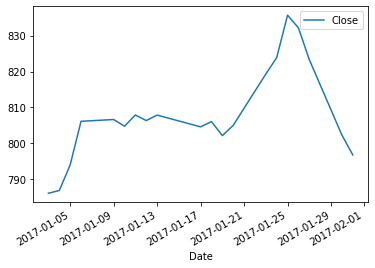

In [28]:
test_data.plot()

### Concating train and test and then will take last 40 train point

In [29]:
total= pd.concat([trained_data['Close'], test_data['Close']], axis= 0)

In [30]:
total.shape

(1278,)

In [31]:
test_data1= total[len(total)- len(test)-40:].values

### reshaping it to get it transformed

In [32]:
test_data1= test_data1.reshape(-1,1)
test_data1[7]

array([736.08])

In [33]:
test_data1.max()

835.67

In [34]:
test_input= scaler.fit_transform(test_data1)

In [35]:
test_input.max()

1.0

### Creating the input for LSTM Prediction

In [36]:
x_test= []
for i in range(40,60):
  x_test.append(test_input[i-40:i, 0])

In [37]:
x_test= np.array(x_test)

### Reshaping the input for LSTM prediction

In [38]:
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [39]:
x_test.shape

(20, 40, 1)

### Predicting the closing Price of Stock using Test Data

In [40]:
predicted_value= model.predict(x_test)

In [41]:
predicted_value= scaler.inverse_transform(predicted_value)

In [42]:
test_data['predicted_value']= predicted_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
test_data.head()

,Close,predicted_value
Date,,
2017-01-03,786.14,778.702576
2017-01-04,786.90,779.072754
2017-01-05,794.02,782.416504
2017-01-06,806.15,788.002380
2017-01-09,806.65,796.801575


### Plotting the Graph between Actual Price and Predicted Price

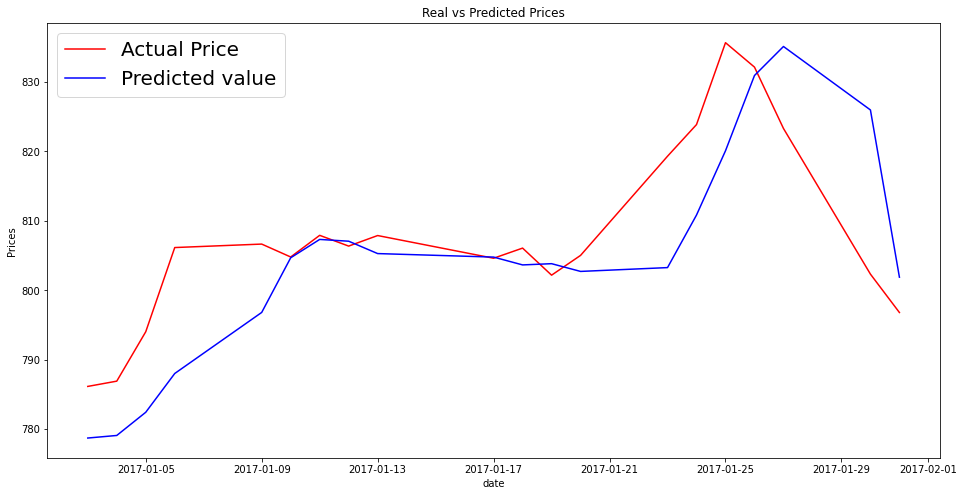

In [44]:
plt.figure(figsize= (16,8))
plt.plot(test_data['Close'], 'red', label= 'Actual Price')
plt.plot(test_data['predicted_value'], 'blue', label= 'Predicted value')
plt.xlabel('date')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [45]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


### Plotting the Validation loss curve to find out if it is good fit or not

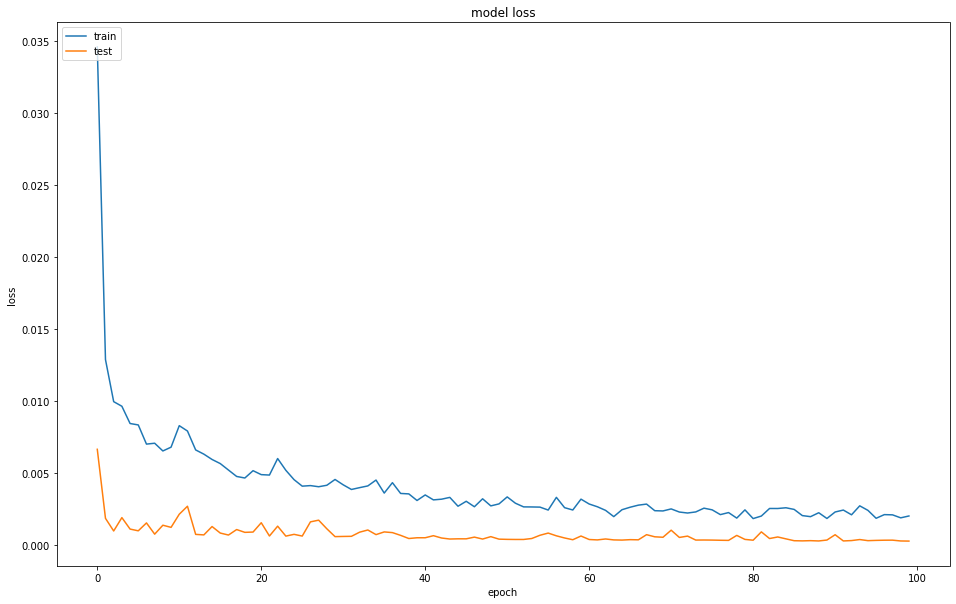

In [46]:
plt.figure(figsize= (16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()